# 🔷 Overview

K-Means is a popular unsupervised machine learning algorithm used for **clustering tasks**. It partitions data into **K distinct clusters** based on feature similarity. The algorithm iteratively assigns each point to the nearest cluster centroid and updates centroids until convergence.

K-Means is widely used in **customer segmentation, anomaly detection, image compression, recommendation systems, and bioinformatics**.

---

## ❓ What is K-Means Clustering?

K-Means works by **minimizing intra-cluster variance**, iteratively refining cluster assignments:

1. **Initialization**: Select K initial centroids (randomly or using K-Means++).
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Compute new centroids as the mean of assigned points.
4. **Repeat**: Continue until centroids no longer change or max iterations are reached.

K-Means works best with **well-separated, spherical clusters**, but struggles with **non-convex clusters and varying densities**.

---

## 🔥 Popular K-Means Variants:

- **Standard K-Means** 🎯: Uses random initialization, sensitive to centroid placement.
- **K-Means++** 🚀: Improved initialization method that **reduces the risk of poor clustering** by spreading initial centroids.
- **Mini-Batch K-Means** ⚡: Uses small random batches to speed up convergence, useful for large datasets.
- **Fuzzy C-Means** 🌫: Assigns **soft cluster memberships** instead of hard assignments.

---

## 📊 Applications of K-Means:

- 📌 **Customer Segmentation** – Grouping users based on purchase behavior.
- 📌 **Image Compression** – Reducing colors by clustering pixel values.
- 📌 **Anomaly Detection** – Identifying outliers in financial transactions.
- 📌 **Document Clustering** – Organizing text data into meaningful groups.

---

## 🛠 Key Considerations:

✅ **Scalability** – K-Means is fast for large datasets.  
✅ **Interpretability** – Easy to understand and implement.  
❌ **Sensitivity to Initialization** – Poor initial centroids can lead to suboptimal clusters.  
❌ **Assumes Spherical Clusters** – May fail for non-convex shapes.


# 🌍 The K-Means Clustering Formula:

A **K-Means** model partitions data into **K clusters** by minimizing the variance within each cluster. The goal is to assign each data point to the nearest centroid while iteratively refining cluster positions.

---

## 🔢 Mathematically, it minimizes:

$$
J = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2
$$

---

## 🔍 Where:

- * $ J   $* → The cost function (inertia), measuring intra-cluster variance.
- * $ K  $* → The number of clusters.
- *$   C_i  $* → The  $ i  $-th cluster containing assigned data points.
- * $ x  $* → A data point in cluster  $ C_i  $.
- * $ \mu_i  $* → The centroid of cluster  $ i  $.
- * $ ||x - \mu_i||^2  $* → The squared Euclidean distance between a data point and its cluster centroid.

---

## 📌 The K-Means Algorithm:

1. **Initialize**: Choose \( K \) initial centroids (randomly or using K-Means++).
2. **Assign**: Allocate each point \( x \) to the nearest centroid \( \mu_i \).
3. **Update**: Compute new centroids as the mean of assigned points:
   $$
   \mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x
   $$
4. **Repeat**: Iterate until centroids do not change significantly.

---

## 🚀 The K-Means++ Initialization:

To improve initial centroid selection, **K-Means++** chooses centroids **probabilistically**, reducing the chance of poor clustering.

**Selection Probability:**
$$
P(x) = \frac{D(x)^2}{\sum_{x' \in X} D(x')^2}
$$
where \( D(x) \) is the distance between a data point and its closest selected centroid.

✅ **Advantage:** Reduces sensitivity to bad initialization.

---

## 📊 Key Insights:

✅ **Works best with well-separated clusters.**  
✅ **Faster and more scalable than hierarchical clustering.**  
❌ **Requires specifying \( K \) beforehand.**  
❌ **Struggles with non-spherical clusters and varying densities.**  

---

🔎 *K-Means++ is recommended for more stable clustering!* 🚀

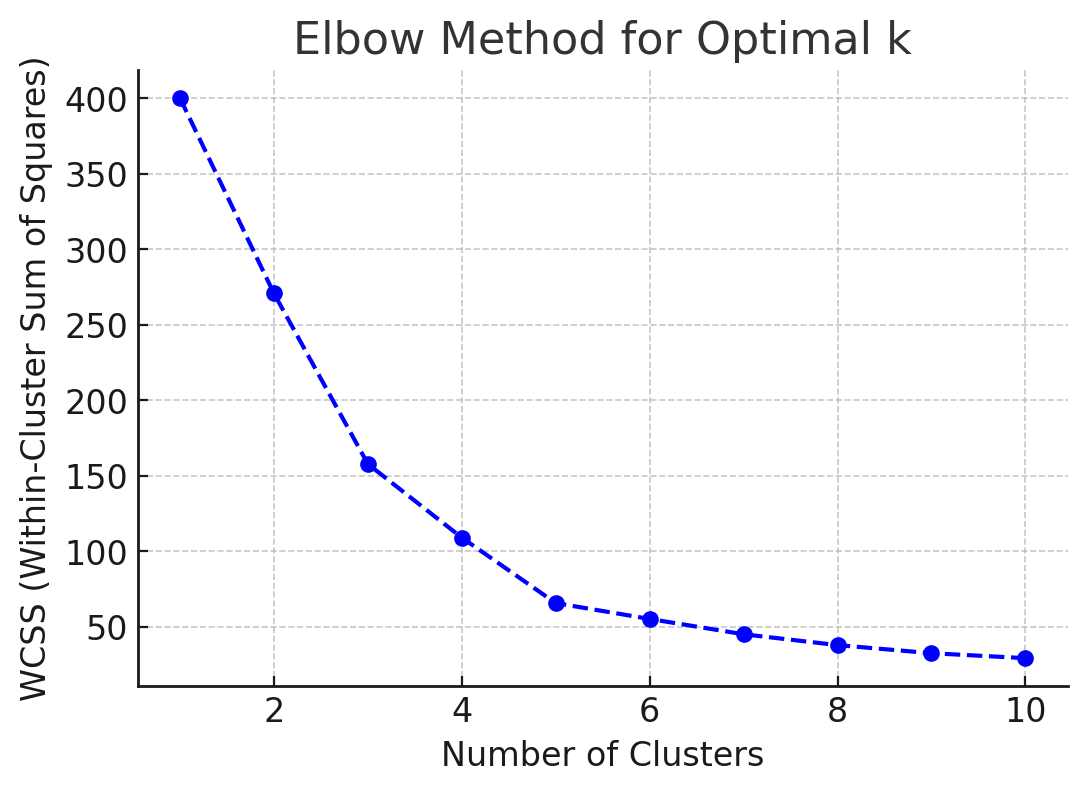

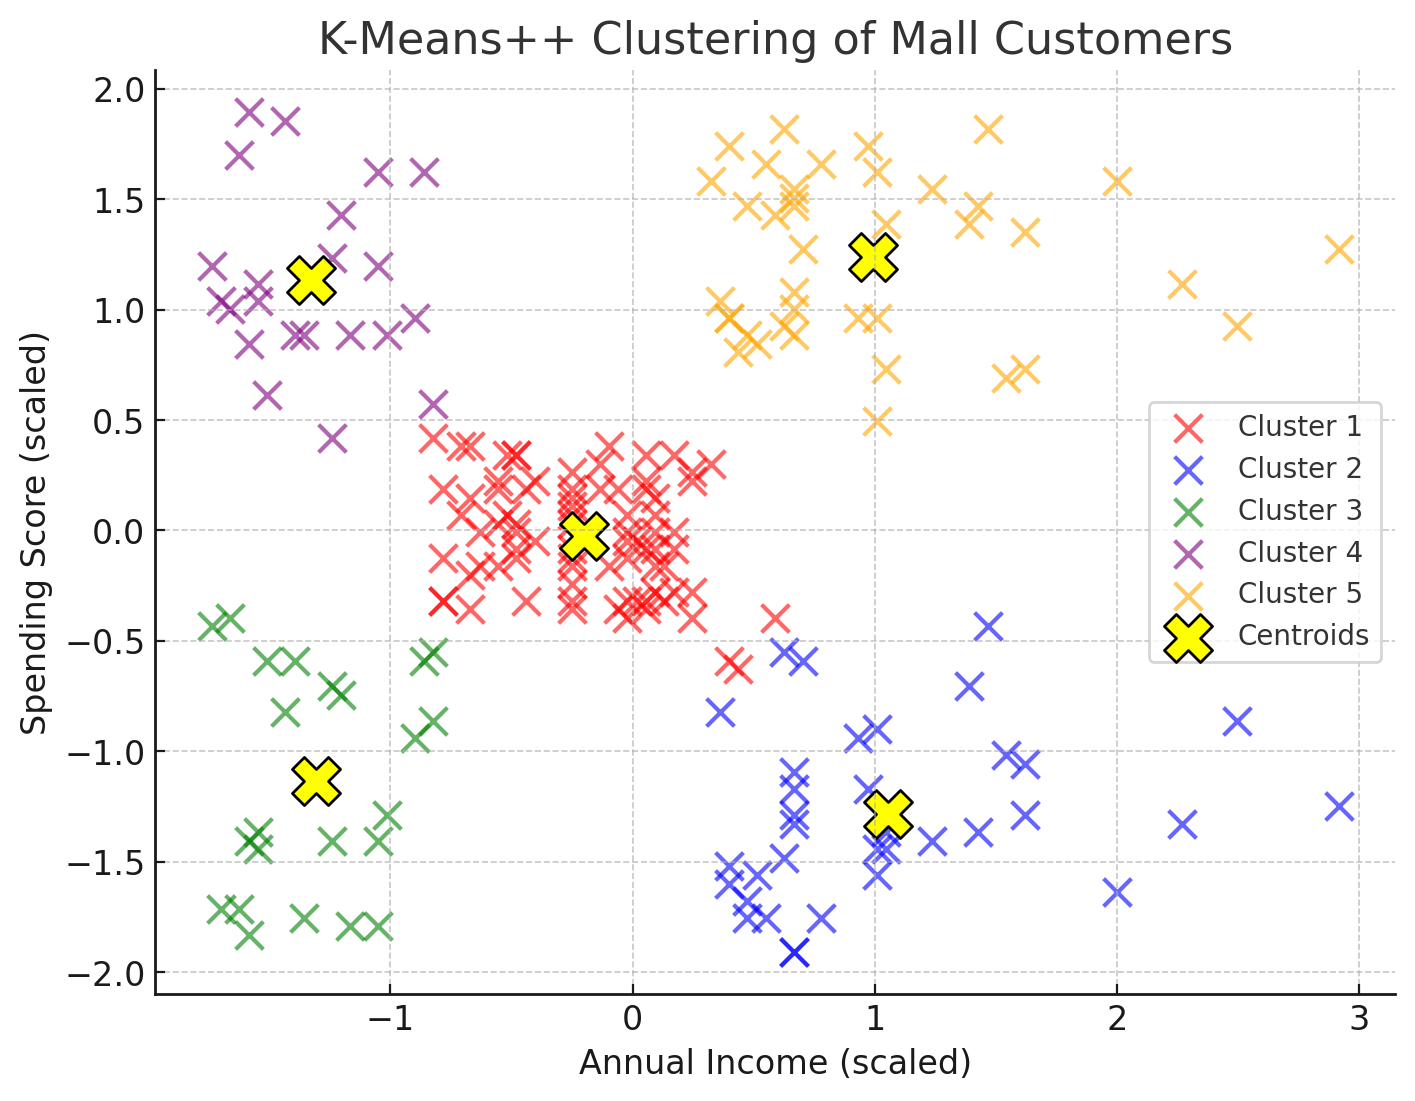

# 📌 Import necessary libraries

In [1]:
# 📌 Import necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for advanced visualizations
from sklearn.cluster import KMeans, AgglomerativeClustering  # Clustering models
from sklearn.mixture import GaussianMixture  # Gaussian Mixture Model (GMM) for clustering
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.preprocessing import StandardScaler  # StandardScaler for data normalization
from sklearn.metrics import silhouette_score, davies_bouldin_score  # Clustering evaluation metrics
from sklearn.model_selection import ParameterGrid  # Grid search for hyperparameter tuning

# 📌 Step 1: Load dataset

In [2]:
# 📌 Step 1: Load dataset
file_path = "Mall_Customers.csv"  # Define the file path for the dataset
df = pd.read_csv(file_path)  # Load dataset into a Pandas DataFrame

# 📌 Step 2: Select features for clustering

In [3]:
# 📌 Step 2: Select features for clustering
X = df.iloc[:, [3, 4]].values  # Select "Annual Income" and "Spending Score" columns as feature matrix

# 📌 Step 3: Normalize the data

In [4]:
# 📌 Step 3: Normalize the data
scaler = StandardScaler()  # Initialize StandardScaler for data normalization
X_scaled = scaler.fit_transform(X)  # Apply scaling to standardize feature values

# 📌 Step 4: Apply PCA for Dimensionality Reduction

In [5]:
# 📌 Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce feature dimensions to 2 for visualization
X_pca = pca.fit_transform(X_scaled)  # Transform data using PCA

# 📌✅✅✅ Step 5: Auto-selection of best hyperparameters

In [6]:
# 📌 Step 5: Auto-selection of best hyperparameters

# ✅ Auto-tune `n_clusters` for K-Means (Elbow Method + Silhouette Score)
best_k, best_silhouette = None, -1  # Initialize best cluster count and silhouette score
for k in range(2, 10):  # Iterate over potential cluster counts from 2 to 9
    kmeans_test = KMeans(n_clusters=k, init='k-means++', random_state=42)  # Initialize K-Means model
    labels = kmeans_test.fit_predict(X_pca)  # Fit model and predict cluster labels
    score = silhouette_score(X_pca, labels)  # Compute silhouette score for cluster quality evaluation
    if score > best_silhouette:  # If silhouette score improves, update best parameters
        best_k, best_silhouette = k, score
print(f"🔍 Best K for K-Means: {best_k} (Silhouette Score: {best_silhouette:.4f})")  # Print best cluster count

# ✅ Auto-tune `n_components` for GMM using Silhouette Score
best_gmm_k, best_gmm_silhouette = None, -1  # Initialize best GMM cluster count and silhouette score
for k in range(2, 10):  # Iterate over potential cluster counts from 2 to 9
    gmm_test = GaussianMixture(n_components=k, covariance_type='full', random_state=42)  # Initialize GMM model
    labels = gmm_test.fit_predict(X_pca)  # Fit model and predict cluster labels
    score = silhouette_score(X_pca, labels)  # Compute silhouette score for cluster quality evaluation
    if score > best_gmm_silhouette:  # If silhouette score improves, update best parameters
        best_gmm_k, best_gmm_silhouette = k, score
print(f"🔍 Best K for GMM: {best_gmm_k} (Silhouette Score: {best_gmm_silhouette:.4f})")  # Print best cluster count


# 📌 Print selected hyperparameters
print(f"\n🔧 Selected Hyperparameters:")
print(f"   - K-Means++: n_clusters = {best_k}, init = 'k-means++'")
print(f"   - Agglomerative Clustering: n_clusters = {best_k}, linkage = 'ward'")
print(f"   - GMM: n_components = {best_gmm_k}, covariance_type = 'full'\n")



🔍 Best K for K-Means: 5 (Silhouette Score: 0.5547)
🔍 Best K for GMM: 5 (Silhouette Score: 0.5537)

🔧 Selected Hyperparameters:
   - K-Means++: n_clusters = 5, init = 'k-means++'
   - Agglomerative Clustering: n_clusters = 5, linkage = 'ward'
   - GMM: n_components = 5, covariance_type = 'full'



# 📌 Step 6: Apply Clustering Algorithms with optimized parameters

In [7]:
# 📌 Step 6: Apply Clustering Algorithms with optimized parameters

# ✅ K-Means++ with optimal `n_clusters`
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)  # Initialize K-Means with best K
y_kmeans = kmeans.fit_predict(X_pca)  # Fit model and predict cluster labels

# ✅ Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=best_k, linkage='ward')  # Initialize Agglomerative Clustering
y_agglo = agglo.fit_predict(X_pca)  # Fit model and predict cluster labels

# ✅ GMM with optimal `n_components`
gmm = GaussianMixture(n_components=best_gmm_k, covariance_type='full', random_state=42)  # Initialize GMM model
y_gmm = gmm.fit_predict(X_pca)  # Fit model and predict cluster labels

# 📌 Step 7: Compute Clustering Metrics

In [9]:
# 📌 Step 7: Compute Clustering Metrics
metrics_data = []  # Initialize list for storing clustering evaluation metrics

def evaluate_clustering(X, labels, algorithm_name):
    """
    Compute clustering evaluation metrics (Silhouette Score, Davies-Bouldin Index)
    for a given clustering model.
    """
    if len(set(labels)) > 1:  # Ensure at least 2 clusters exist
        silhouette = silhouette_score(X, labels)  # Compute silhouette score
        davies_bouldin = davies_bouldin_score(X, labels)  # Compute Davies-Bouldin index
    else:  # If only one cluster exists, return "N/A"
        silhouette, davies_bouldin = "N/A", "N/A"
    return [algorithm_name, silhouette, davies_bouldin]  # Return evaluation results

# Append evaluation results for each clustering model
metrics_data.append(evaluate_clustering(X_pca, y_kmeans, "K-Means++"))
metrics_data.append(evaluate_clustering(X_pca, y_agglo, "Agglomerative"))
metrics_data.append(evaluate_clustering(X_pca, y_gmm, "GMM"))

# Convert list of metrics into Pandas DataFrame
metrics_table = pd.DataFrame(metrics_data, columns=["Algorithm", "Silhouette Score", "Davies-Bouldin Index"])
print("\n📊 Clustering Performance Metrics:\n", metrics_table)  # Print metrics table


📊 Clustering Performance Metrics:
        Algorithm  Silhouette Score  Davies-Bouldin Index
0      K-Means++          0.554657              0.572236
1  Agglomerative          0.553809              0.577862
2            GMM          0.553689              0.576010


# 🎯🔗📉 Step 8: Visualization of Clustering Results


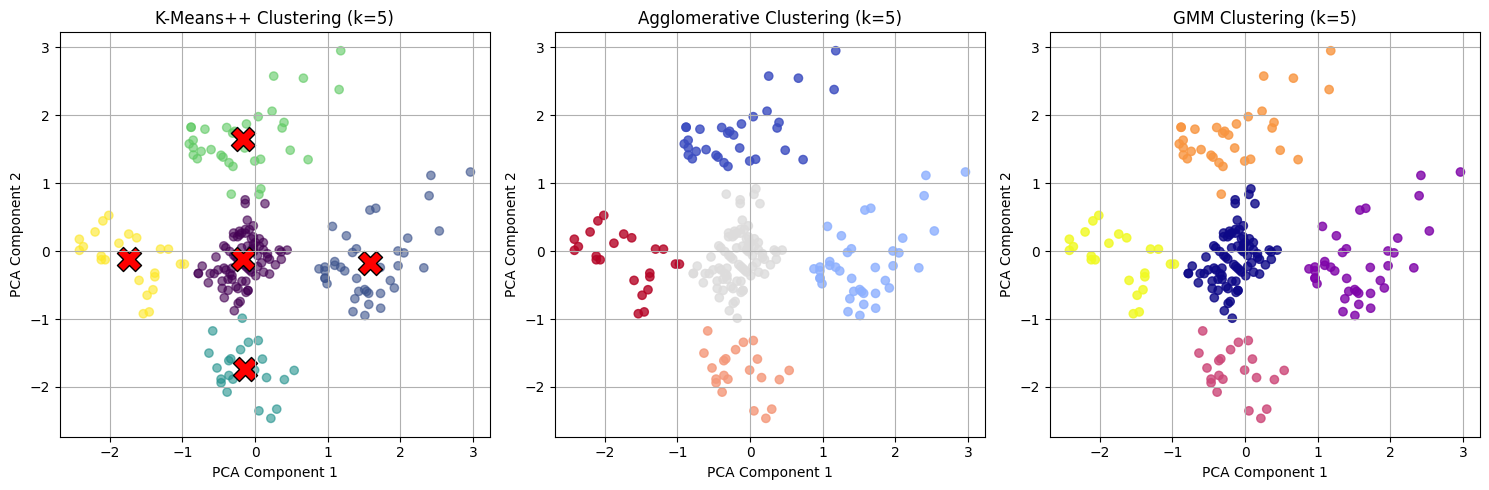

In [10]:
# 📌 Step 8: Visualization of Clustering Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create 1 row, 3-column subplot layout

# 🎯 K-Means++ Clustering
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6)  # Plot data points
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  # Plot centroids
                s=300, c='red', marker='X', edgecolors='black', label='Centroids')
axes[0].set_title(f"K-Means++ Clustering (k={best_k})")  # Set title

# 🔗 Agglomerative Clustering
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_agglo, cmap='coolwarm', alpha=0.8)  # Plot data points
axes[1].set_title(f"Agglomerative Clustering (k={best_k})")  # Set title

# 📉 GMM Clustering
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm, cmap='plasma', alpha=0.8)  # Plot data points
axes[2].set_title(f"GMM Clustering (k={best_gmm_k})")  # Set title

# Apply labels and grid to each subplot
for ax in axes:
    ax.set_xlabel("PCA Component 1")  # Set x-axis label
    ax.set_ylabel("PCA Component 2")  # Set y-axis label
    ax.grid(True)  # Enable grid for better visualization

plt.tight_layout()  # Adjust subplot layout for better appearance
plt.savefig("clustering_comparison_no_dbscan.png", dpi=300)  # Save visualization as PNG
plt.show()  # Display plots
